#AIR A4 - Constraint Satisfaction Problem: N-Queens
---
Implement n-queens (Backtracking)



##Programmers' Perspective

> S = {s; e; X; Y; Fme; Ff; DD; NDD}

s = start state
*   s = {n}
  *  Where n is the number of queens

e = end state
*   e = {2D Representation of the nxn Chess Board with all the queens placed}

X = {X1}
*   X1 = s

Y = {Y1}
*   Y1 = e

Fme = {f0}
*   f0 = function to perform backtracking

Ff = {f1,f2,f3,f4, f5, f6}
where
*   f1 = function for Agent : Perception
*   f2 = function for Agent : Cognition
*   f3 = function for Agent : Action
*   f4 = function for Agent : Goal
*   f5 = function to place a queen
*   f6 = function to unplace a queen

DD = integer array of size n

NDD = No non deterministic data

##Theory

###N Queens
* The N queens puzzle is the problem of placing N chess queens on an 8×8 chessboard so that no two queens threaten each other, where N is a natural number.
* Thus, a solution requires that no two queens share the same row, column, or diagonal.

###Mathematical Model - Constraint Satisfaction Problem

for a given n, N-Queens has been defined as a Constraint Satisfaction Problem 

> <X,D,C>

N' is a set of Whole Numbers less than n

N' = {x | x∈W and x<n  }

Set of variable representing n Queens
>X = {Qᵢ} ∀ i∈N'

Set of Domain for each Queen
>D = {Dᵢ | Dᵢ∈N'} ∀ i∈N'

Set of Constraints
Two types of constraints for any two queens
Each queen is placed in a different column at the time of input itself, therefore we don't need to define a constraint for it explicitly.
>C = {C¹ᵢⱼ, C²ᵢⱼ}  ∀ i,j ∈ N'

####Constraint C¹ᵢⱼ : 
For two queens Qᵢ and Qⱼ, no two queens can be on the same row.
* C¹ᵢⱼ = <t¹ᵢⱼ, R¹ᵢⱼ>
 * t¹ᵢⱼ = {Qᵢ,Qⱼ}
 * R¹ᵢⱼ = {x≠y | x=Qᵢ and y=Qⱼ}

####Constraint C²ᵢⱼ : 
For two queens Qᵢ and Qⱼ, no two queens can be on the same diagonal.
* C²ᵢⱼ = <t²ᵢⱼ, R²ᵢⱼ>
 * t²ᵢⱼ = {i,j,Qᵢ,Qⱼ}
 * R²ᵢⱼ = { |x-y|≠|x'-y'|    |    x=i, x'=Qᵢ, x'=j, x'=Qⱼ }


###Perception
Given n number of queens
  *   Consider an integer array of size n.
  *   Each element represents a queen
  *   Index of the element represents column of the queen
  *   Value of the element represents row of the queen
  *   If the queen is unplaced, value of the element is -1

###Cognition

N Queens is being solved using backtracking

With each step we need to check for three constraints
 1. If two Queens are in the same row
 2. If two Queens are in the same normal diagonal
 3. If two Queens are in the same backward diagonal

Since we are placing/unplacing a queen one column at a time, we need not check for it

To Lookup these constraints in real time, we use three boolean arrays

The size of the boolean array to look up row is n

The size of the other two is (2*n-1)

The index of the lookup of normal diagonal is (row+col)

The index of the lookup of backward diagonal is (row-col+n-1)

]The value 'n-1' is to lookup of backward diagonal to facilitate zero-based indexing

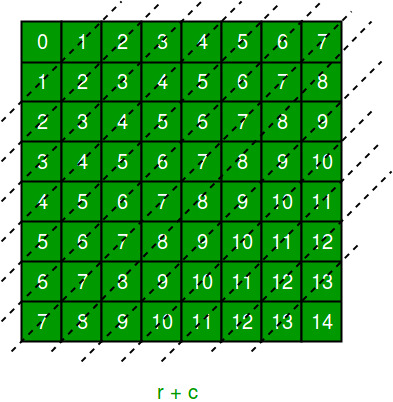

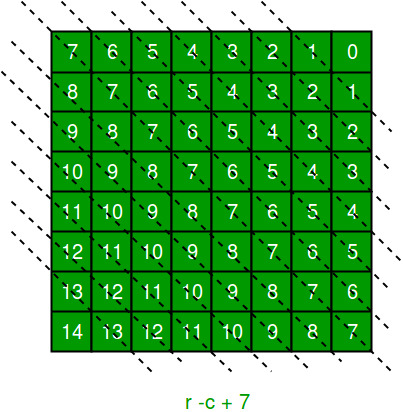

###Action


####Algorithm for solving N queens using back tracking

Algorithm: N-Queen(j)
* n is the number of queens
* queens[] is an integer array which stores row number of a queen
* queens' indexes represent the column number of a queen
* j is the column in which we will be placing the queen, starting from 0
* rowLookUp is a boolean array which is True for rows in which a new queen cannot be placed
* diagonalNormalLookUp is a boolean array which is True for normal diagonal in which a new queen cannot be placed
* diagonalBackwardLookUp is a boolean array which is True for backward diagonals in which a new queen cannot be placed

* Possible(i,j) returns true if rowLookUp(i)=False and diagonalNormalLookUp(i+j)=False and diagonalBackwardLookUp(i-j+n-1)=False


Steps:
1. if j=n then
  
  1. return true

2. for i <- 1 to n do

  1. if Possible(i,j) then do
    
    1. queens[j] <- i
    
    2. rowLookUp[i] <- True
      
    3. diagonalNormalLookUp[i+j] <- True
    
    4. diagonalBackwardLookUp[i-j+n-1] <- True
      
    5. if N-Queen(j+1) then 
  
       1. return true
      
    6. queens[j] <- -1
      
    7. rowLookUp[i] <- False
    
    8. diagonalNormalLookUp[i+j] <- False
      
    9. diagonalBackwardLookUp[i-j+n-1] <- False

3. return false
    



###Goal 

Our goal is to fill the queens[] array such that it satisfies the constraints and then generate a 2D Representation of the same

Example (8 queens) : [0, 4, 7, 5, 2, 6, 1, 3]

Resulting 2D representation:-

Q	_	_	_	_	_	_	_	
_	_	_	_	_	_	Q	_	
_	_	_	_	Q	_	_	_	
_	_	_	_	_	_	_	Q	
_	Q	_	_	_	_	_	_	
_	_	_	Q	_	_	_	_	
_	_	_	_	_	Q	_	_	
_	_	Q	_	_	_	_	_	


If n queens is not possible, Program should output "Solution does not exist" followed by 2D representation of a blank chess board

###Class Diagram

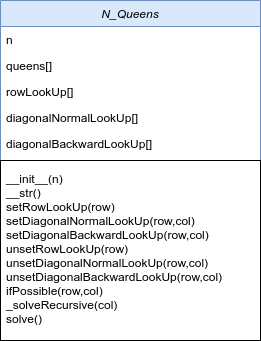

###State Diagram

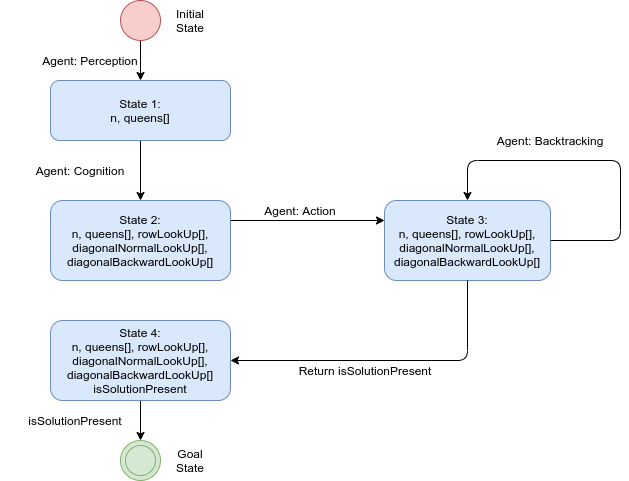

##Main Assignment

In [1]:
class N_Queens:

  '''
  PERCEPTION

  n = number of queens

  queens = Array of size n
      ith Indexed  Queen is the Queen in the ith Column
      It stores the row value of the queen if she is placed, -1 otherwise
  
  rowLookUp = Boolean Array of size n
    Check if a threat exists in a particular row
  
  diagonalNormalLookUp = Boolean Array of size 2*n-1
    Check if a threat exists in a normal diagonal
  
  diagonalBackwardLookUp = Boolean Array of size 2*n-1
    Check if a threat exists in a backward diagonal

  '''
  #Parameterized Constructor
  def __init__(self, n):

    self.n = n
    self.queens = [-1] * n

    self.rowLookUp = [False] * n
    self.diagonalNormalLookUp = [False] * (n+n-1)
    self.diagonalBackwardLookUp = [False] * (n+n-1)

  #Print Object as a board
  def __str__(self):
    res = '\n\t'
    for num in range(self.n): 
      res += (str(num) + "\t") 
    res += '\n\n'
    board =  [[ '_' for j in range(self.n)] for i in range(self.n)]
    for col, row in enumerate(self.queens):
      if(row!=-1):
        board[row][col] = 'Q'
    for index, i in enumerate(range(self.n)): 
      res += str(index) + "\t"
      for j in range(self.n): 
        res += (str(board[i][j]) + "\t") 
      res += '\n\n'
    return res


  '''COGNITION'''
  #Set and Unset Functions for the Lookups
  def setDiagonalNormalLookUp(self,row,col):
        self.diagonalNormalLookUp[row+col] = True

  def unsetDiagonalNormalLookUp(self,row,col):
        self.diagonalNormalLookUp[row+col] = False

  def setDiagonalBackwardLookUp(self,row,col):
        self.diagonalBackwardLookUp[row-col+self.n-1] = True

  def unsetDiagonalBackwardLookUp(self,row,col):
        self.diagonalBackwardLookUp[row-col+self.n-1] = False

  def setRowLookUp(self,row):
        self.rowLookUp[row] = True

  def unsetRowLookUp(self,row):
        self.rowLookUp[row] = False


  #Returns true only if all three lookups are false
  '''CONSTRAINTS'''
  def ifPossible(self, row, col):
    return ( self.rowLookUp[row] == False and 
            self.diagonalNormalLookUp[row+col] == False and 
            self.diagonalBackwardLookUp[row-col+self.n-1] == False )

  '''ALGORITHM'''
  #Solves Recursively, one column at a time
  def _solveRecursive(self, col):

    #Return True if N Queens have been placed
    if col == self.n: 
        return True

    #For each cell in the current column
    for row in range(self.n): 

      #If It is possible to place a Queen
      if self.ifPossible(row, col):
        
        #Place the Queen
        self.queens[col] = row

        #Set the Lookups 
        self.setRowLookUp(row)
        self.setDiagonalNormalLookUp(row,col)
        self.setDiagonalBackwardLookUp(row,col)
        
        #Try to place the next queen in the next column
        if self._solveRecursive(col + 1) == True: 
          return True
        
        #Unplace the queen
        self.queens[col] = -1

        #Unset the Lookups
        self.unsetRowLookUp(row)
        self.unsetDiagonalNormalLookUp(row,col)
        self.unsetDiagonalBackwardLookUp(row,col)

    #Return False if No queens were placed in the Column
    return False

  #Driver function to solve
  def solve(self):

    #Try to place the first Queen in the first column
    if self._solveRecursive(0) == False: 
      print ("Solution does not exist") 
      return False

    return True


def execute(n):
  puzzle = N_Queens(n)
  print('Before Solving : ',puzzle)
  puzzle.solve()
  print('\n\nAfter Solving : ',puzzle)

In [2]:
execute(8) 

Before Solving :  
	0	1	2	3	4	5	6	7	

0	_	_	_	_	_	_	_	_	

1	_	_	_	_	_	_	_	_	

2	_	_	_	_	_	_	_	_	

3	_	_	_	_	_	_	_	_	

4	_	_	_	_	_	_	_	_	

5	_	_	_	_	_	_	_	_	

6	_	_	_	_	_	_	_	_	

7	_	_	_	_	_	_	_	_	




After Solving :  
	0	1	2	3	4	5	6	7	

0	Q	_	_	_	_	_	_	_	

1	_	_	_	_	_	_	Q	_	

2	_	_	_	_	Q	_	_	_	

3	_	_	_	_	_	_	_	Q	

4	_	Q	_	_	_	_	_	_	

5	_	_	_	Q	_	_	_	_	

6	_	_	_	_	_	Q	_	_	

7	_	_	Q	_	_	_	_	_	




In [ ]:
execute(4) 

Before Solving :  
	0	1	2	3	

0	_	_	_	_	

1	_	_	_	_	

2	_	_	_	_	

3	_	_	_	_	




After Solving :  
	0	1	2	3	

0	_	_	Q	_	

1	Q	_	_	_	

2	_	_	_	Q	

3	_	Q	_	_	




In [ ]:
execute(3) 

Before Solving :  
	0	1	2	

0	_	_	_	

1	_	_	_	

2	_	_	_	


Solution does not exist


After Solving :  
	0	1	2	

0	_	_	_	

1	_	_	_	

2	_	_	_	




In [ ]:
execute(2)

Before Solving :  
	0	1	

0	_	_	

1	_	_	


Solution does not exist


After Solving :  
	0	1	

0	_	_	

1	_	_	




In [ ]:
execute(9)

Before Solving :  
	0	1	2	3	4	5	6	7	8	

0	_	_	_	_	_	_	_	_	_	

1	_	_	_	_	_	_	_	_	_	

2	_	_	_	_	_	_	_	_	_	

3	_	_	_	_	_	_	_	_	_	

4	_	_	_	_	_	_	_	_	_	

5	_	_	_	_	_	_	_	_	_	

6	_	_	_	_	_	_	_	_	_	

7	_	_	_	_	_	_	_	_	_	

8	_	_	_	_	_	_	_	_	_	




After Solving :  
	0	1	2	3	4	5	6	7	8	

0	Q	_	_	_	_	_	_	_	_	

1	_	_	_	_	Q	_	_	_	_	

2	_	Q	_	_	_	_	_	_	_	

3	_	_	_	_	_	Q	_	_	_	

4	_	_	_	_	_	_	_	_	Q	

5	_	_	Q	_	_	_	_	_	_	

6	_	_	_	_	_	_	_	Q	_	

7	_	_	_	Q	_	_	_	_	_	

8	_	_	_	_	_	_	Q	_	_	




In [3]:
class N_Queens:

  '''
  PERCEPTION

  n = number of queens

  queens = Array of size n
      ith Indexed  Queen is the Queen in the ith Column
      It stores the row value of the queen if she is placed, -1 otherwise
  
  rowLookUp = Boolean Array of size n
    Check if a threat exists in a particular row
  
  diagonalNormalLookUp = Boolean Array of size 2*n-1
    Check if a threat exists in a normal diagonal
  
  diagonalBackwardLookUp = Boolean Array of size 2*n-1
    Check if a threat exists in a backward diagonal

  '''
  #Parameterized Constructor
  def __init__(self, n):

    self.n = n
    self.queens = [-1] * n

    self.rowLookUp = [False] * n
    self.diagonalNormalLookUp = [False] * (n+n-1)
    self.diagonalBackwardLookUp = [False] * (n+n-1)

    self.steps = 0

  #Print Object as a board
  def __str__(self):
    res = '\n\t'
    for num in range(self.n): 
      res += (str(num) + "\t") 
    res += '\n\n'
    board =  [[ '_' for j in range(self.n)] for i in range(self.n)]
    for col, row in enumerate(self.queens):
      if(row!=-1):
        board[row][col] = 'Q'
    for index, i in enumerate(range(self.n)): 
      res += str(index) + "\t"
      for j in range(self.n): 
        res += (str(board[i][j]) + "\t") 
      res += '\n\n'
    return res


  '''COGNITION'''
  #Set and Unset Functions for the Lookups
  def setDiagonalNormalLookUp(self,row,col):
        self.diagonalNormalLookUp[row+col] = True

  def unsetDiagonalNormalLookUp(self,row,col):
        self.diagonalNormalLookUp[row+col] = False

  def setDiagonalBackwardLookUp(self,row,col):
        self.diagonalBackwardLookUp[row-col+self.n-1] = True

  def unsetDiagonalBackwardLookUp(self,row,col):
        self.diagonalBackwardLookUp[row-col+self.n-1] = False

  def setRowLookUp(self,row):
        self.rowLookUp[row] = True

  def unsetRowLookUp(self,row):
        self.rowLookUp[row] = False


  #Returns true only if all three lookups are false
  '''CONSTRAINTS'''
  def ifPossible(self, row, col):
    return ( self.rowLookUp[row] == False and 
            self.diagonalNormalLookUp[row+col] == False and 
            self.diagonalBackwardLookUp[row-col+self.n-1] == False )

  '''ALGORITHM'''
  #Solves Recursively, one column at a time
  def _solveRecursive(self, col):

    self.steps = self.steps+1
    print('_________ CALL ',self.steps,'______________')

    print('Queens placed so far - ', col)
    #Return True if N Queens have been placed
    if col == self.n: 
      print('All Queens Placed')
      print('Returning...')
      return True

    #For each cell in the current column
    for row in range(self.n): 

      #If It is possible to place a Queen
      if self.ifPossible(row, col):
        
        #Place the Queen
        self.queens[col] = row
        print('New Queen placed at - ', (row,col))
        print(self)

        #Set the Lookups 
        self.setRowLookUp(row)
        self.setDiagonalNormalLookUp(row,col)
        self.setDiagonalBackwardLookUp(row,col)
        
        #Try to place the next queen in the next column
        if self._solveRecursive(col + 1) == True: 
          return True
        
        #Unplace the queen
        self.queens[col] = -1
        print('Queen unplaced from - ', (row,col))
        print(self)

        #Unset the Lookups
        self.unsetRowLookUp(row)
        self.unsetDiagonalNormalLookUp(row,col)
        self.unsetDiagonalBackwardLookUp(row,col)

    #Return False if No queens were placed in the Column
    print('No Cell satisfied constraint in Col - ',col)
    return False

  #Driver function to solve
  def solve(self):

    print('Before Solving : ',self)

  def ifPossible(self, row, col):
    return ( self.rowLookUp[row] == False and 
            self.diagonalNormalLookUp[row+col] == False and 
            self.diagonalBackwardLookUp[row-col+self.n-1] == False )
    #Try to place the first Queen in the first column
    if self._solveRecursive(0) == False: 
      print('\n\nAfter Solving : ',self)
      print ("Solution does not exist")
    else:
      print('\n\nAfter Solving : ',self)


N_Queens(4).solve()

Before Solving :  
	0	1	2	3	

0	_	_	_	_	

1	_	_	_	_	

2	_	_	_	_	

3	_	_	_	_	


_________ CALL  1 ______________
Queens placed so far -  0
New Queen placed at -  (0, 0)

	0	1	2	3	

0	Q	_	_	_	

1	_	_	_	_	

2	_	_	_	_	

3	_	_	_	_	


_________ CALL  2 ______________
Queens placed so far -  1
New Queen placed at -  (2, 1)

	0	1	2	3	

0	Q	_	_	_	

1	_	_	_	_	

2	_	Q	_	_	

3	_	_	_	_	


_________ CALL  3 ______________
Queens placed so far -  2
No Cell satisfied constraint in Col -  2
Queen unplaced from -  (2, 1)

	0	1	2	3	

0	Q	_	_	_	

1	_	_	_	_	

2	_	_	_	_	

3	_	_	_	_	


New Queen placed at -  (3, 1)

	0	1	2	3	

0	Q	_	_	_	

1	_	_	_	_	

2	_	_	_	_	

3	_	Q	_	_	


_________ CALL  4 ______________
Queens placed so far -  2
New Queen placed at -  (1, 2)

	0	1	2	3	

0	Q	_	_	_	

1	_	_	Q	_	

2	_	_	_	_	

3	_	Q	_	_	


_________ CALL  5 ______________
Queens placed so far -  3
No Cell satisfied constraint in Col -  3
Queen unplaced from -  (1, 2)

	0	1	2	3	

0	Q	_	_	_	

1	_	_	_	_	

2	_	_	_	_	

3	_	Q	_	_	


#Modification - PCAG 

In [11]:
class N_Queens_PCAG:


  '''CALLING THE FOUR STATES'''
  #Parameterized Constructor
  def __init__(self, n):
    self.perception(n)
    self.cognition(n)
    isSolutionPresent = self.action()
    self.goal(isSolutionPresent)


  '''PERCEPTION'''
  def perception(self, n):
    self.n = n
    self.queens = [-1] * n
    print('\nBefore Solving : ',self)
    return n


  '''COGNITION'''
  def cognition(self, n):
    self.rowLookUp = [False] * n
    self.diagonalNormalLookUp = [False] * (n+n-1)
    self.diagonalBackwardLookUp = [False] * (n+n-1)


  '''ACTION'''
  def action(self):
    return self.backtrack(0)


  '''BACKTRACKING FUNCTION'''
  def backtrack(self, col):

    #Return True if N Queens have been placed
    if col == self.n: 
        return True

    #For each cell in the current column
    for row in range(self.n): 

      #If It is possible to place a Queen
      if self.ifPossible(row, col):
        
        #Place the Queen and Set the lookups
        self.placeQueen(row, col)
        
        #Try to place the next queen in the next column
        if self.backtrack(col + 1) == True: 
          return True
        
        #Unplace the Queen and unset the lookups
        self.unplaceQueen(row, col)

    #Return False if No queens were placed in the Column
    return False


  '''GOAL'''
  def goal(self, isSolutionPresent):
    if not isSolutionPresent:
      print('Solution is not present')
    print('\n\nAfter Solving : ',self)


  '''STRING REPRESENTATION'''
  #Print Object as a board
  def __str__(self):
    res = '\n\t'
    for num in range(self.n): 
      res += (str(num) + "\t") 
    res += '\n\n'
    board =  [[ '_' for j in range(self.n)] for i in range(self.n)]
    for col, row in enumerate(self.queens):
      if(row!=-1):
        board[row][col] = 'Q'
    for index, i in enumerate(range(self.n)): 
      res += str(index) + "\t"
      for j in range(self.n): 
        res += (str(board[i][j]) + "\t") 
      res += '\n\n'
    return res


  '''HELPER FUNCTIONS'''
  #Set and Unset Functions for the Lookups
  def setDiagonalNormalLookUp(self,row,col):
        self.diagonalNormalLookUp[row+col] = True

  def unsetDiagonalNormalLookUp(self,row,col):
        self.diagonalNormalLookUp[row+col] = False

  def setDiagonalBackwardLookUp(self,row,col):
        self.diagonalBackwardLookUp[row-col+self.n-1] = True

  def unsetDiagonalBackwardLookUp(self,row,col):
        self.diagonalBackwardLookUp[row-col+self.n-1] = False

  def setRowLookUp(self,row):
        self.rowLookUp[row] = True

  def unsetRowLookUp(self,row):
        self.rowLookUp[row] = False

  def ifPossible(self, row, col):
    return ( self.rowLookUp[row] == False and 
            self.diagonalNormalLookUp[row+col] == False and 
            self.diagonalBackwardLookUp[row-col+self.n-1] == False )

  def placeQueen(self, row, col):
    self.queens[col] = row
    self.setRowLookUp(row)
    self.setDiagonalNormalLookUp(row,col)
    self.setDiagonalBackwardLookUp(row,col)

  def unplaceQueen(self, row, col):
    self.queens[col] = -1
    self.unsetRowLookUp(row)
    self.unsetDiagonalNormalLookUp(row,col)
    self.unsetDiagonalBackwardLookUp(row,col)
    
def execute(n):
  puzzle = N_Queens_PCAG(n)

execute(4)


Before Solving :  
	0	1	2	3	

0	_	_	_	_	

1	_	_	_	_	

2	_	_	_	_	

3	_	_	_	_	




After Solving :  
	0	1	2	3	

0	_	_	Q	_	

1	Q	_	_	_	

2	_	_	_	Q	

3	_	Q	_	_	


